# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [3]:
# import libraries
import numpy as np
import pandas as pd

In [4]:
# Upload the data
data = pd.read_csv("day.csv")
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the head of the dataset and validate information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the shape of data
data.shape



(730, 16)

In [7]:
# drop instant, casual and registered variable columns as these are non-needed variables suggetsed in model problem statement
data.drop(['instant'], axis = 1, inplace = True)
data.drop(['casual','registered'], axis = 1, inplace = True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


## Findings
From above tested validations we can conclude that all the columns has datataype as int or float except dteday which is Date type column. 
All the columns having non-null values.
Some fields are categorical but int/float. Will analyze them further and convert into dummy variables as per requirement.

In [9]:
### Removing unwanted column dtedate as month and year is already present in separate columns.
data.drop(['dteday'], axis = 1, inplace = True)
data.head()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
## Taking backup of data variable to keep original data incase we need any reference 

data_back = data
data.head()
data['season'].value_counts()
data_back.head()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Step 2 : Converting Categrical variables into numeric dummy variables 

In [11]:

# Mapping Numeric values os season as per dictionary values
data['season']=data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Get the dummy variables for the feature 'season'
season_dummy = pd.get_dummies(data['season'],drop_first=True)
season_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   spring  730 non-null    uint8
 1   summer  730 non-null    uint8
 2   winter  730 non-null    uint8
dtypes: uint8(3)
memory usage: 2.3 KB


In [13]:
# Add the season dummy variable results to the original dataframe 
data = pd.concat([data, season_dummy], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [14]:
# Drop 'season' as we have created the dummies for it
data.drop(['season'], axis = 1, inplace = True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
dtypes: float64(4), int64(7), uint8(3)
memory usage: 65.0 KB


,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [15]:
# Mapping Numeric values of mnth column as per months in a year for better understanding
data['mnth']=data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data.head()
mnth_dummy = pd.get_dummies(data['mnth'],drop_first=True)
mnth_dummy.info()

# Add the mnth dummy variable results to the original dataframe 
data = pd.concat([data, mnth_dummy], axis = 1)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Aug     730 non-null    uint8
 1   Dec     730 non-null    uint8
 2   Feb     730 non-null    uint8
 3   Jan     730 non-null    uint8
 4   Jul     730 non-null    uint8
 5   Jun     730 non-null    uint8
 6   Mar     730 non-null    uint8
 7   May     730 non-null    uint8
 8   Nov     730 non-null    uint8
 9   Oct     730 non-null    uint8
 10  Sep     730 non-null    uint8
dtypes: uint8(11)
memory usage: 8.0 KB


,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [16]:
# Drop 'mnth' as we have created the dummies for it
data.drop(['mnth'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Aug         730 non-null    uint8  
 14  Dec         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  Jan         730 non-null    uint8  
 17  Jul         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Mar         730 non-null    u

In [17]:
# Mapping Numeric values of ""weekday" column as per months in a year for better understanding
data['weekday']=data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
data.head()
weekday_dummy = pd.get_dummies(data['weekday'],drop_first=True)
weekday_dummy.info()

# Add the 'weekday' dummy variable results to the original dataframe 
data = pd.concat([data, weekday_dummy], axis = 1)
data.head()

# Drop 'weekday' as we have created the dummies for it
data.drop(['weekday'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Mon     730 non-null    uint8
 1   Sat     730 non-null    uint8
 2   Sun     730 non-null    uint8
 3   Thu     730 non-null    uint8
 4   Tue     730 non-null    uint8
 5   Wed     730 non-null    uint8
dtypes: uint8(6)
memory usage: 4.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   weathersit  730 non-null    int64  
 4   temp        730 non-null    float64
 5   atemp       730 non-null    float64
 6   hum         730 non-null    float64
 7   windspeed   730 non-null    float64
 8   cnt         730 non-null    int64  
 9   spring      730 n

In [18]:
# Creating dummy variables for column 'weathersit' 
weathersit_dummy = pd.get_dummies(data['weathersit'],drop_first=True)
weathersit_dummy.info()

# Add the 'weathersit' dummy variable results to the original dataframe 
data = pd.concat([data, weathersit_dummy], axis = 1)
data.head()

# Drop 'weathersit' as we have created the dummies for it
data.drop(['weathersit'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2       730 non-null    uint8
 1   3       730 non-null    uint8
dtypes: uint8(2)
memory usage: 1.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8 

# Step 3 : Visualizing All the data with numeric variables.
Lets now visualize and predict the variables by plotting them with target variable and understand data analytically.
We'll visualise our data using matplotlib and seaborn

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

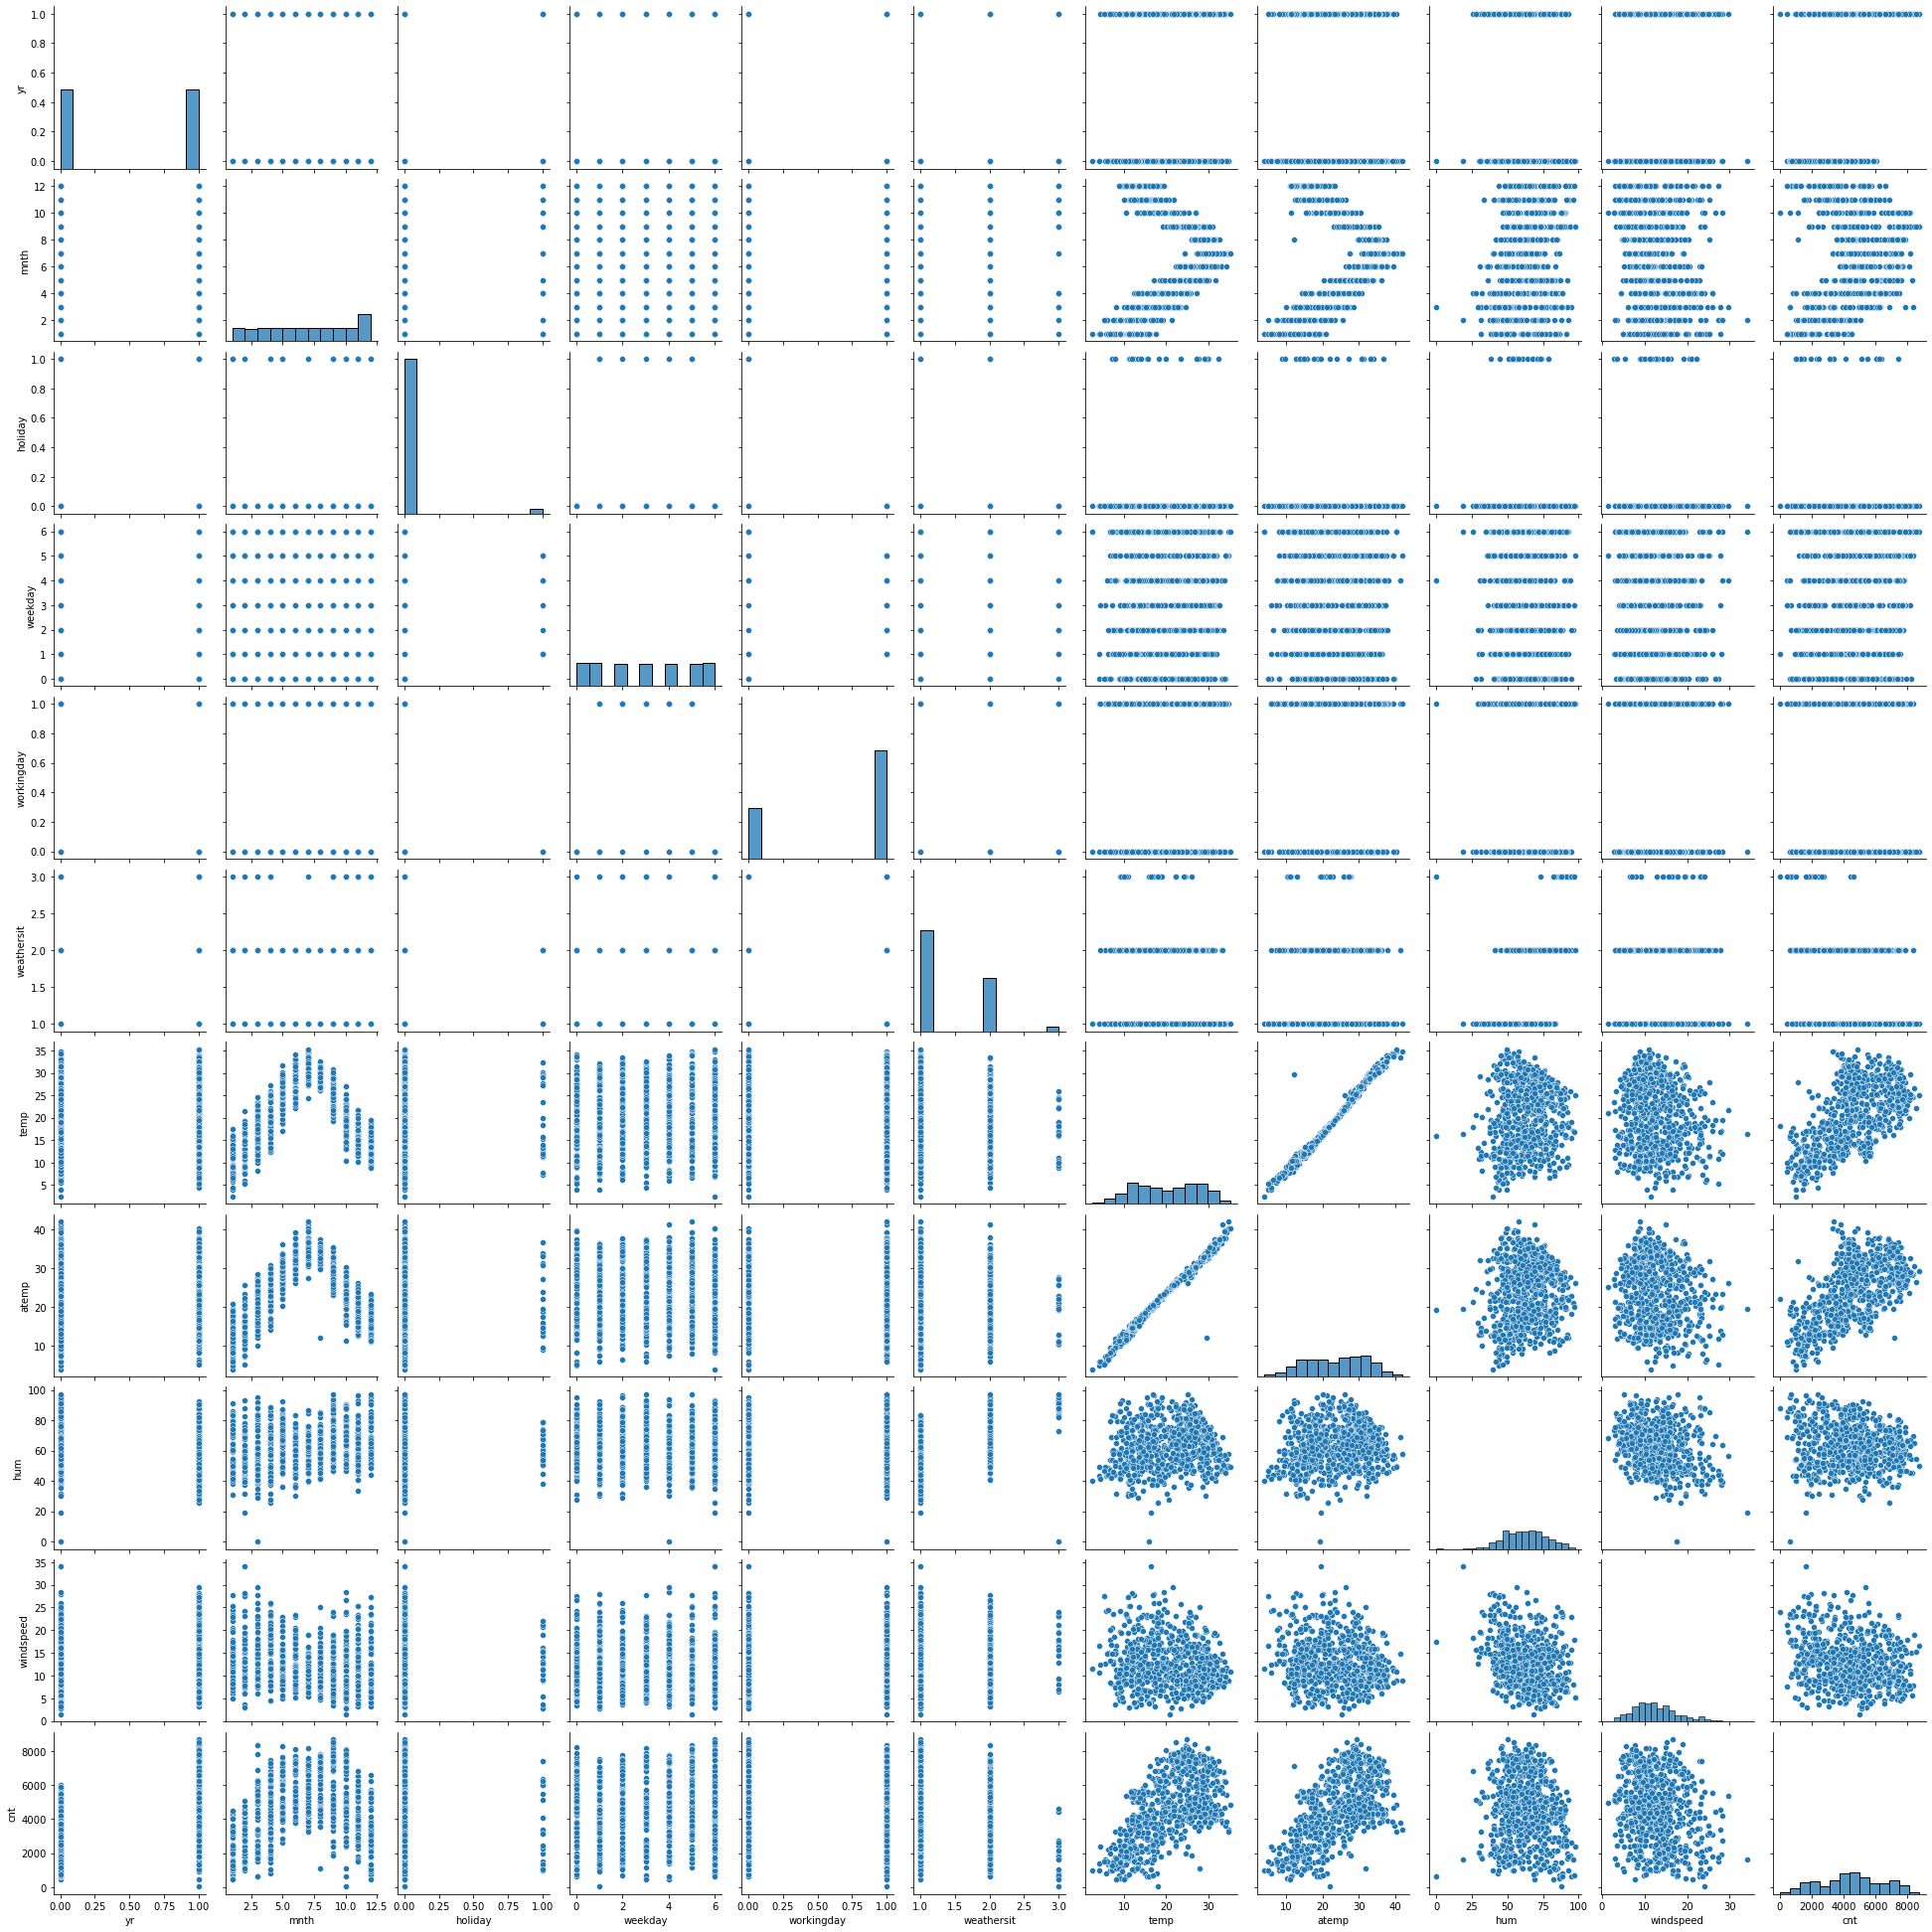

In [20]:
# Visualizing All the data first 
sns.pairplot(data_back)
plt.show()

#  Step 4 : Split the data into train and test data sets.


In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
# Check the info and shape of train data 
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   spring      510 non-null    uint8  
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  Aug         510 non-null    uint8  
 12  Dec         510 non-null    uint8  
 13  Feb         510 non-null    uint8  
 14  Jan         510 non-null    uint8  
 15  Jul         510 non-null    uint8  
 16  Jun         510 non-null    uint8  
 17  Mar         510 non-null    uint8  
 18  May         510 non-null    uint8  
 19  Nov         510 non-null    

(510, 30)

In [23]:
# Check the info and shape of test data 
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   cnt         219 non-null    int64  
 8   spring      219 non-null    uint8  
 9   summer      219 non-null    uint8  
 10  winter      219 non-null    uint8  
 11  Aug         219 non-null    uint8  
 12  Dec         219 non-null    uint8  
 13  Feb         219 non-null    uint8  
 14  Jan         219 non-null    uint8  
 15  Jul         219 non-null    uint8  
 16  Jun         219 non-null    uint8  
 17  Mar         219 non-null    uint8  
 18  May         219 non-null    uint8  
 19  Nov         219 non-null    

(219, 30)

# EXPLORATORY DATA ANALYSIS
We need to perform the EDA on TRAINING (df_train) Dataset.
Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

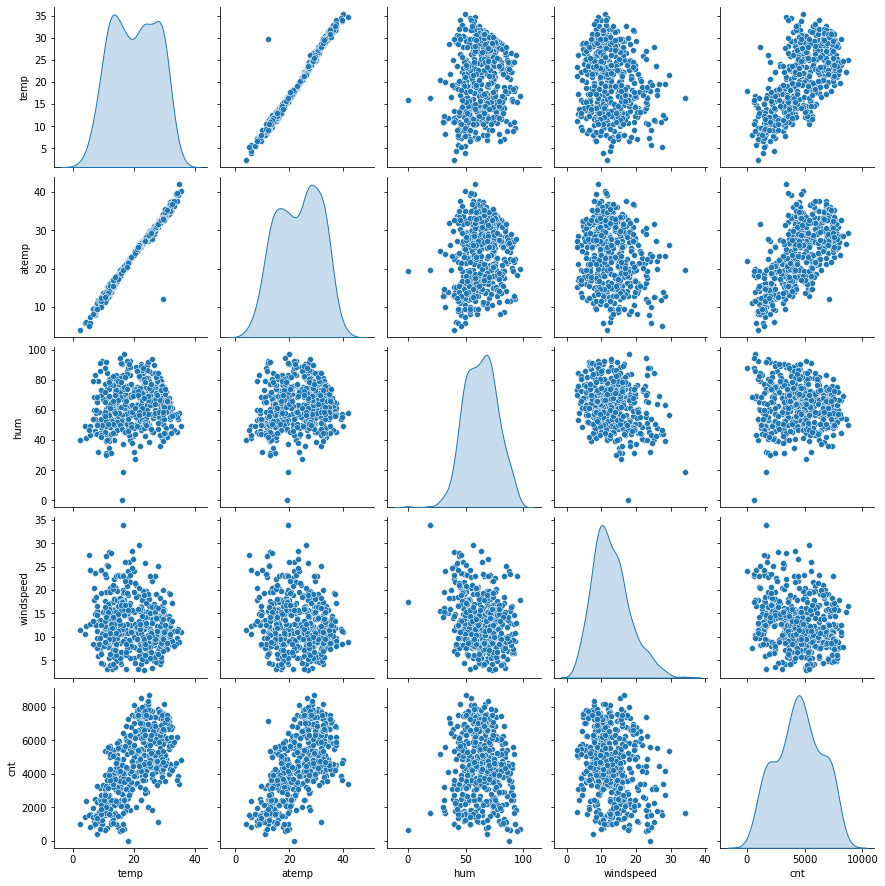

In [24]:
# Create a new dataframe of only numeric variables:

df_train_numeric=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_train_numeric, diag_kind='kde')
plt.show()

In [25]:
# Insights of above pair plot tells us 
# 1) There is a linear Relation between temp, atemp and cnt variables.

### Validate all the Categorical variables with old data


In [28]:
data_back.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


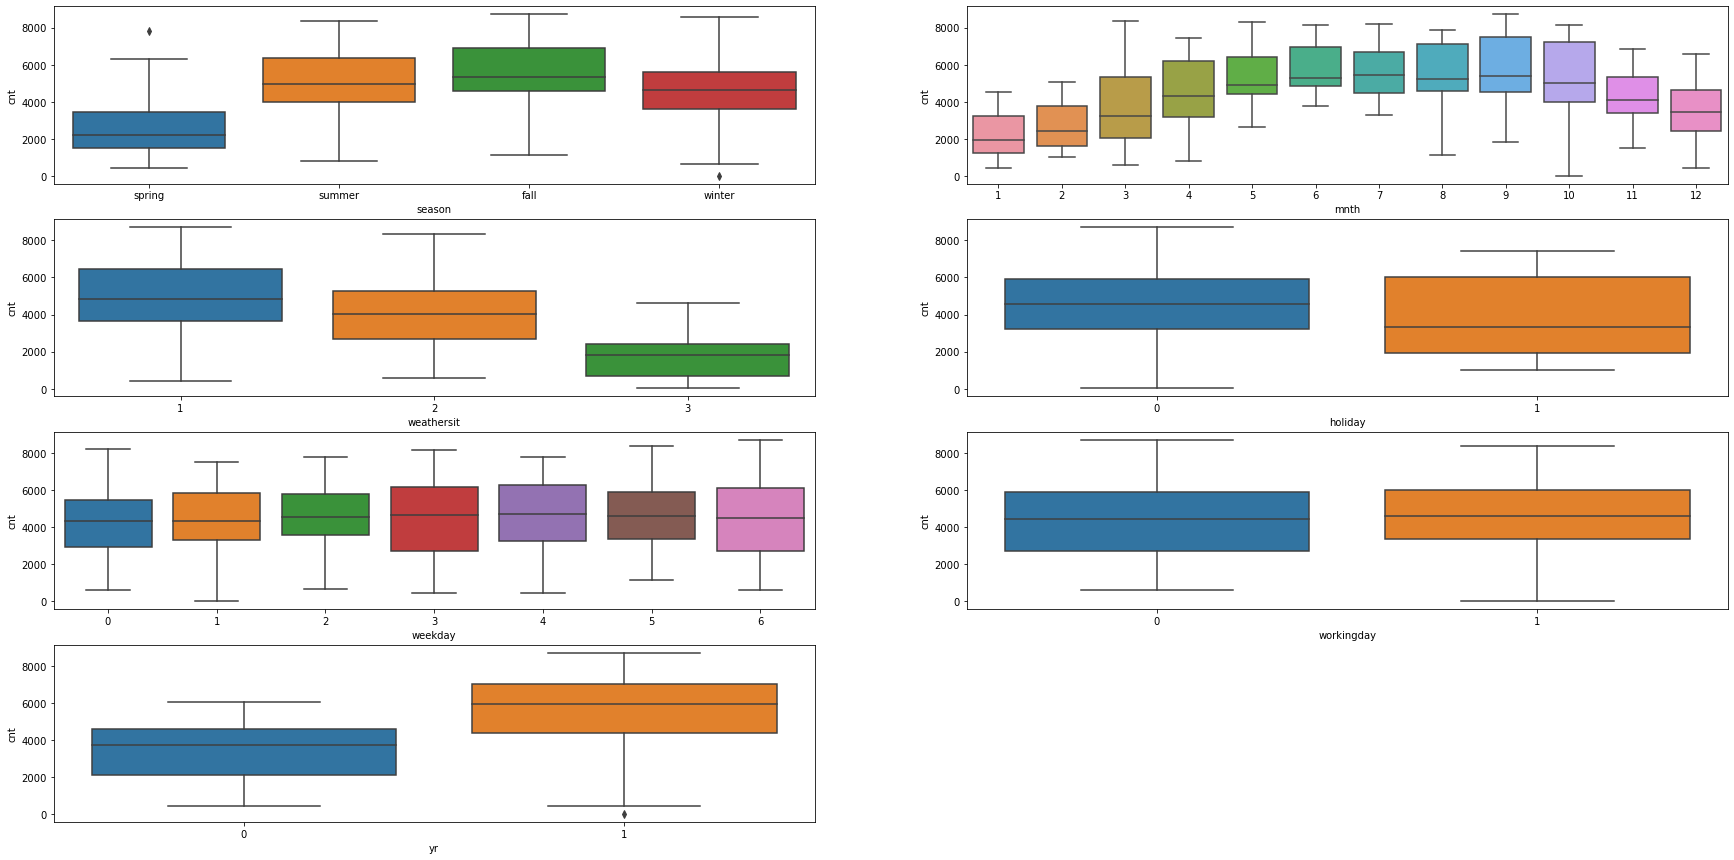

In [33]:
plt.figure(figsize=(30, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = data_back)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data_back)
plt.subplot(4,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data_back)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data_back)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data_back)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data_back)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data_back)
plt.show()

In [31]:
data_back.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Insights of Categorical variables 

season : From the observation we can conclude that maximum bike were sold in season 3 : Fall with median above 5000 
followed by season 2 : summer and season 4 : winter. We can conclude that season can be a good predictor of bike 
sales.

Holiday : Over 97% bike sold was not on Holiday. 
So we can say that column holiday can not be relevant for a dependant variable 

weathersit : We found from the results that around 63% bikes were sold 'weathersit1' with a median of close to 5000 booking
 (for the period of 2 years). This was followed by 'weathersit2' with 33 % of total booking. 
This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

Month : We found variations monthly basis in bikes demand. Month 5,6,7,8 and 9 looks best demanding months. 
So we can say that month can be a good predictor.

Weekday : We see almost same pattern of bike selling on weekday. This variable can have some or no influence in prediction.

workingday : Almost 69 % of bikes were sold on workingday so it can be a good predictor.

# Correlation matrix for Multi linear approach




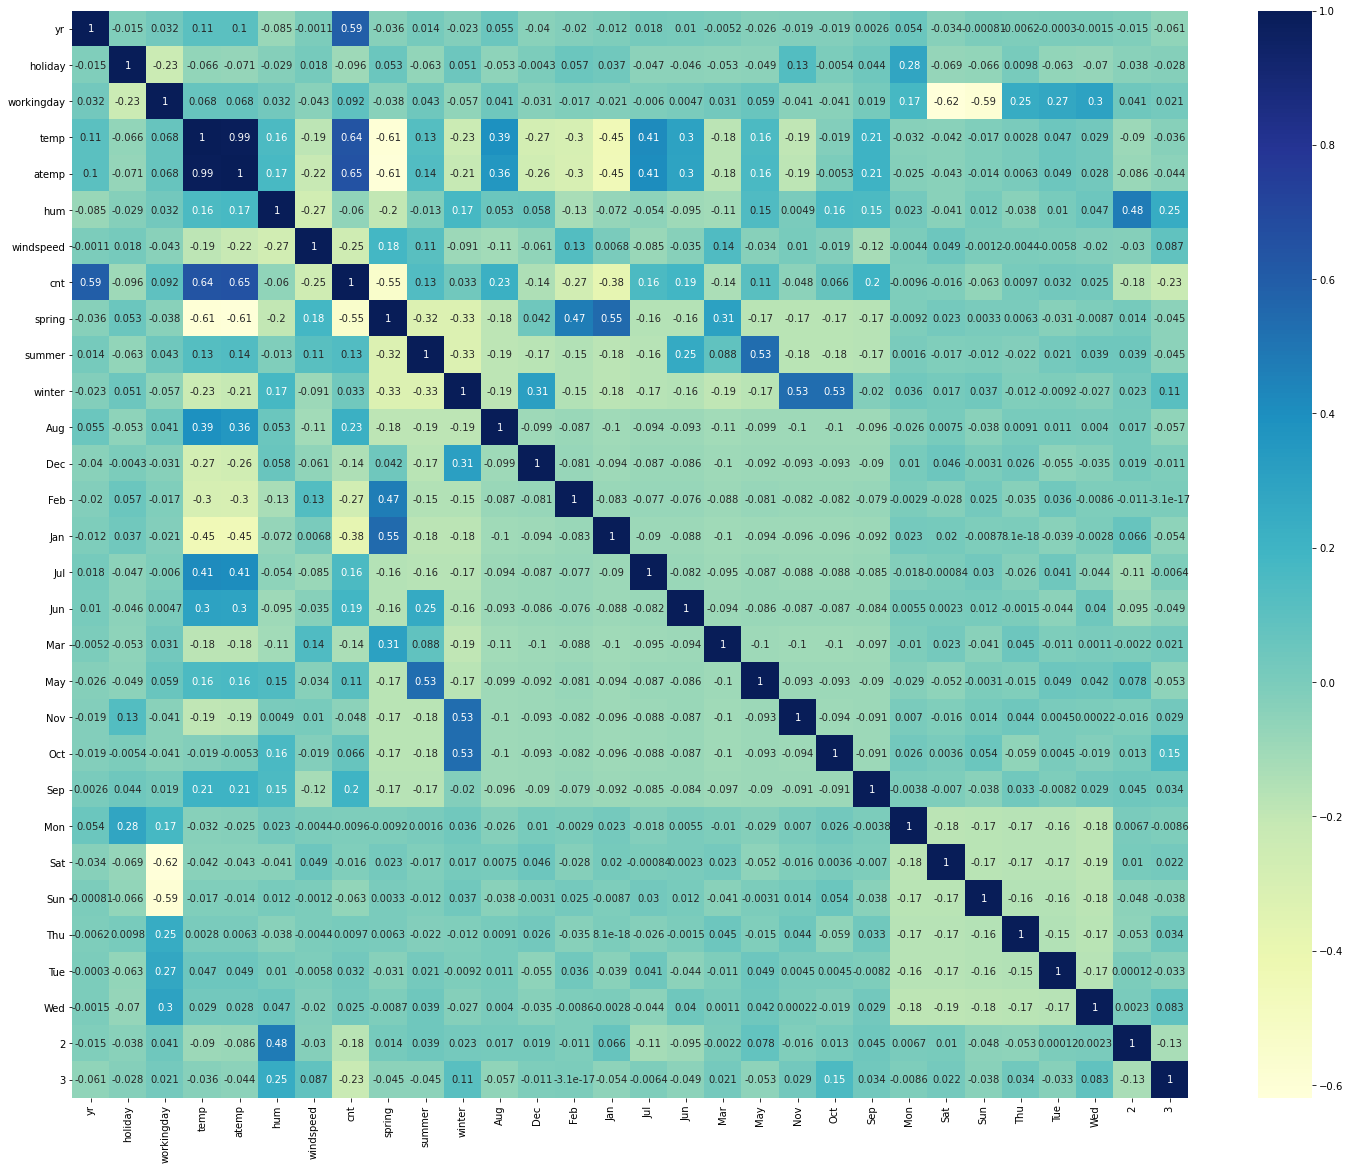

In [34]:
#Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# From the above map we can say that temp and atemp are highly correlated with cnt and then yr. Will refer this map for checking 
# high p-values and VIF for correlated variables.


In [36]:
# Rescaling the features
# Apply scaler() to all the numeric variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars_list = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars_list] = scaler.fit_transform(df_train[num_vars_list])
df_train.head()

<ipython-input-36-ad326712b0eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars_list] = scaler.fit_transform(df_train[num_vars_list])
C:\Users\puneet\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2,3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0


In [37]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2,3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 5 : Building a Linear Model

In [40]:
# Dividing into X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train


In [44]:
# We will first analyze all the relevant variablels usinf 'RFE -> Recursive feature elimination' as variables count is more.
# Importing RFE and LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with 18 variables output
linearmodel_object = LinearRegression()
linearmodel_object.fit(X_train, y_train)

rfe = RFE(linearmodel_object, 18)           
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 10),
 ('Tue', False, 12),
 ('Wed', False, 11),
 (2, True, 1),
 (3, True, 1)]

In [47]:
# Running RFE with for 15 variables output

rfe = RFE(linearmodel_object, 15)           
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 12),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 13),
 ('Tue', False, 15),
 ('Wed', False, 14),
 (2, True, 1),
 (3, True, 1)]

In [48]:
# Columns with RFE support 
RFE_Columns = X_train.columns[rfe.support_]
RFE_Columns

Index([        'yr',    'holiday', 'workingday',       'temp',        'hum',
        'windspeed',     'spring',     'summer',     'winter',        'Jan',
              'Jul',        'Sep',        'Sat',            2,            3],
      dtype='object')

In [58]:
#Creating train dataframe with RFE columns 
X_train_RFE = X_train[RFE_Columns]
X_train_RFE

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,2,3
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0


In [59]:
X_train_RFE

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,2,3
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0


# Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=1/1−𝑅𝑖2



In [61]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
13,2,2.29
0,yr,2.09
12,Sat,1.98


In [63]:
# Now we need to use statsmodel interms of checking p-values 
import statsmodels.api as sm

# Adding a constant to X_train rfe data to use statsmodell
X_train_Linear_model1 = sm.add_constant(X_train_RFE)

# Create a first fitted model
Linear_R_1 = sm.OLS(y_train, X_train_Linear_model1).fit()

# Checking the params of model
Linear_R_1.params

const         0.251042
yr            0.230502
holiday      -0.058529
workingday    0.043521
temp          0.509836
hum          -0.154716
windspeed    -0.185956
spring       -0.050806
summer        0.049660
winter        0.094426
Jan          -0.034326
Jul          -0.053193
Sep           0.081186
Sat           0.053721
2            -0.057824
3            -0.248777
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(Linear_R_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.31e-191
Time:                        14:10:25   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

#Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

# Model2

In [66]:
# Removing hum based on its high VIF value  
X_train_new = X_train_RFE.drop(["hum"], axis = 1)

In [67]:
## Checking VIF after droping hum column 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,Sat,1.97
8,Jan,1.62
9,Jul,1.59


In [68]:
# Now we need to use statsmodel interms of checking p-values 
import statsmodels.api as sm

# Adding a constant to X_train rfe data to use statsmodell
X_train_Linear_model2 = sm.add_constant(X_train_new)

# Create a first fitted model
Linear_R_2 = sm.OLS(y_train, X_train_Linear_model2).fit()

# Checking the params of model
Linear_R_2.params

# Checking the summary of model
print(Linear_R_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.33e-189
Time:                        14:47:24   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

# Model3

In [69]:
# Removing holiday variable based on its high p-value value  
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [70]:
## Checking VIF after droping 'holiday' column 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.31
0,yr,2.08
6,winter,1.92
10,Sat,1.84
7,Jan,1.62
8,Jul,1.59


In [71]:
# Now we need to use statsmodel interms of checking p-values 
import statsmodels.api as sm

# Adding a constant to X_train rfe data to use statsmodell
X_train_Linear_model3 = sm.add_constant(X_train_new)

# Create a first fitted model
Linear_R_3 = sm.OLS(y_train, X_train_Linear_model3).fit()

# Checking the params of model
Linear_R_3.params

# Checking the summary of model
print(Linear_R_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.11e-189
Time:                        15:05:26   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.031      5.294      0.0

# Model 4 

In [72]:
# Removing Jan month variable based on its high p-value value  
X_train_new = X_train_new.drop(["Jan"], axis = 1)

In [73]:
## Checking VIF after droping 'Jan' column 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
9,Sat,1.83
7,Jul,1.58
10,2,1.56


In [74]:
# Now we need to use statsmodel interms of checking p-values 
import statsmodels.api as sm

# Adding a constant to X_train rfe data to use statsmodell
X_train_Linear_model4 = sm.add_constant(X_train_new)

# Create a first fitted model
Linear_R_4 = sm.OLS(y_train, X_train_Linear_model4).fit()

# Checking the params of model
Linear_R_4.params



const         0.149280
yr            0.233807
workingday    0.054735
temp          0.492470
windspeed    -0.149998
spring       -0.066220
summer        0.046893
winter        0.085092
Jul          -0.048914
Sep           0.073841
Sat           0.066577
2            -0.082998
3            -0.289240
dtype: float64

In [75]:
# Checking the summary of model
print(Linear_R_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.28e-189
Time:                        15:10:49   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.031      4.886      0.0

# Model 5

In [76]:

# Removing column Jul due to high p-value 
X_train_new = X_train_new.drop(["Jul"], axis = 1)

In [77]:
## Checking VIF after droping 'Jul' column 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,Sat,1.83
6,winter,1.77
9,2,1.56
7,Sep,1.23


In [78]:
# Now we need to use statsmodel interms of checking p-values 
import statsmodels.api as sm

# Adding a constant to X_train rfe data to use statsmodell
X_train_Linear_model5 = sm.add_constant(X_train_new)

# Create a first fitted model
Linear_R_5 = sm.OLS(y_train, X_train_Linear_model5).fit()

# Checking the params of model
Linear_R_5.params

const         0.140538
yr            0.234322
workingday    0.055691
temp          0.479972
windspeed    -0.150066
spring       -0.055103
summer        0.061539
winter        0.097174
Sep           0.087175
Sat           0.066892
2            -0.081726
3            -0.290193
dtype: float64

In [79]:
# Checking the summary of model
print(Linear_R_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.86e-189
Time:                        15:27:57   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1405      0.031      4.599      0.0

# Model 6

In [80]:
# Removing column spring due to high p-value 
X_train_new = X_train_new.drop(["spring"], axis = 1)

In [81]:
## Checking VIF after droping 'spring' column 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Sat,1.69
4,summer,1.57
8,2,1.53
5,winter,1.40
6,Sep,1.20
9,3,1.08


In [82]:
# Now we need to use statsmodel interms of checking p-values 
import statsmodels.api as sm

# Adding a constant to X_train rfe data to use statsmodell
X_train_Linear_model6 = sm.add_constant(X_train_new)

# Create a first fitted model
Linear_R_6 = sm.OLS(y_train, X_train_Linear_model6).fit()

# Checking the params of model
Linear_R_6.params

const         0.075325
yr            0.233056
workingday    0.056323
temp          0.549936
windspeed    -0.155238
summer        0.087429
winter        0.131826
Sep           0.097236
Sat           0.067688
2            -0.081347
3            -0.288021
dtype: float64

In [83]:
# Checking the summary of model
print(Linear_R_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.47e-188
Time:                        15:34:13   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

### Model's Insight 
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and
the p-values for all the predictors seems to be significant. 
For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Step 6 : Residual Analysis of the train data

### Error terms are normally distributed with mean zero (not X, Y)


In [84]:
y_train_pred_cnt = Linear_R_6.predict(X_train_Linear_model6)

Text(0.5, 0, 'Errors')

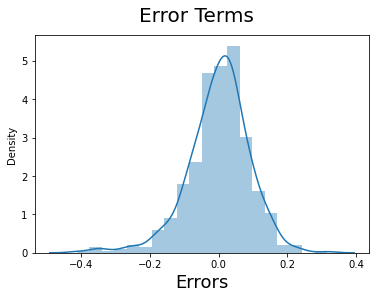

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# Insights
#From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# Step 7 : MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (Linear_R_6)

Applying the scaling on the test sets
Note that we will only apply transform to numeric variables now.

In [86]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2,3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [87]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,2,3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   spring      219 non-null    uint8  
 8   summer      219 non-null    uint8  
 9   winter      219 non-null    uint8  
 10  Aug         219 non-null    uint8  
 11  Dec         219 non-null    uint8  
 12  Feb         219 non-null    uint8  
 13  Jan         219 non-null    uint8  
 14  Jul         219 non-null    uint8  
 15  Jun         219 non-null    uint8  
 16  Mar         219 non-null    uint8  
 17  May         219 non-null    uint8  
 18  Nov         219 non-null    uint8  
 19  Oct         219 non-null    

In [89]:
# Selecting the variables from final model 

X_test = X_test[X_train_new.columns]
X_test.head()

,yr,workingday,temp,windspeed,summer,winter,Sep,Sat,2,3
184,0,0,0.831783,0.084219,0,0,0,0,1,0
535,1,1,0.901354,0.153728,1,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,0,1,0
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0,0


In [90]:
# Adding constant to X_test 
X_test_Linear_Model6 = sm.add_constant(X_test)
X_test_Linear_Model6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   windspeed   219 non-null    float64
 5   summer      219 non-null    uint8  
 6   winter      219 non-null    uint8  
 7   Sep         219 non-null    uint8  
 8   Sat         219 non-null    uint8  
 9   2           219 non-null    uint8  
 10  3           219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [91]:
#  Making final predictions using final model and test data 
y_pred = Linear_R_6.predict(X_test_Linear_Model6)

Text(0, 0.5, 'y_pred')

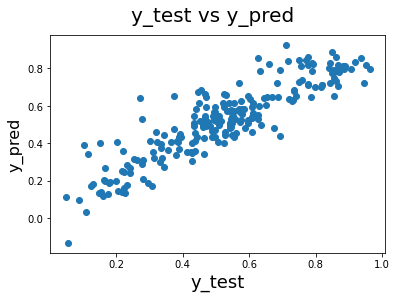

In [92]:
# Step 8 : Model Evaluation using y_test and y_pred
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# R^2 Value for TEST

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7955844377237249

In [95]:
# Find adjusted R2 Value
# n is number of rows in X
r2 = 0.7955844377237249
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7857567664604425

# Final Result Comparison
Train R^2 :0.836
Train Adjusted R^2 :0.832
Test R^2 :0.80
Test Adjusted R^2 :0.79
This seems to be a really good model that can very well 'Generalize' various datasets
    

# Final Report 
FINAL REPORT
As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (Col_Name -> 'temp') - A coefficient value of ‘0.549936’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.549936 units.
weathersit 3 (Col_Name -> '3') - A coefficient value of ‘-0.288021’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire 
numbers by -0.288021 units.
Year (Col_Name -> 'yr') - A coefficient value of ‘0.233056’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.233056 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

Next Best features : 

windspeed (Col_Name -> 'windspeed') : - A coefficient value of ‘-0.155238’ indicated that,
a unit increase in windspeed variable decreases the bike hire numbers by -0.155238 units.
Season 4 (Col_Name -> 'winter'): - A coefficient value of ‘0.131826’ indicated that w.r.t Season 1,
a unit increase in season 4 variable increases the bike hire numbers by 0.131826 units.

# Final equation to find cnt value 
cnt = 0.075325 + (yr × 0.233056) + (workingday × 0.056323) + (temp × 0.549936) − windspeed × 0.155238) + summer × 0.087429) + winter × 0.131826) + 
Sep × 0.097236) + Sat × 0.067688) − (2 × 0.081347) − (3  × 0.288021)